<a href="https://colab.research.google.com/github/M2203114/Python_AI/blob/fall2024/03_lab_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Считывание файла

In [15]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('winequality-red.csv')

# Просмотр первых строк данных
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Определение типа задачи

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Проверка уникальных значений в целевой переменной
print("Уникальные значения в столбце 'quality':", y.unique())

Уникальные значения в столбце 'quality': [5 6 7 4 8 3]


Уникальные значения в столбце quality показывают, что у нас многоклассовая классификация, так как количество уникальных значений больше двух.


Предобработка данных

Разделение выборки на тренировочную и тестовую


In [17]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Проверка и заполнение пропусков**

In [18]:
# Проверка пропусков
print("Пропуски в данных (train):")
print(X_train.isnull().sum())
print("Пропуски в данных (test):")
print(X_test.isnull().sum())

# Заполнение пропусков (если они есть)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

Пропуски в данных (train):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
Пропуски в данных (test):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


**Нормирование числовых признаков**

In [19]:
from sklearn.preprocessing import StandardScaler

# Инициализация StandardScaler
scaler = StandardScaler()

# Нормирование тренировочных данных
X_train_scaled = scaler.fit_transform(X_train)

# Нормирование тестовых данных
X_test_scaled = scaler.transform(X_test)

**Обучение моделей**

**Линейная модель (LogisticRegression)**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Инициализация модели
logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))

# Обучение модели
logreg.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 random_state=42))

**Деревянная модель**

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели
dt = DecisionTreeClassifier(random_state=42)

# Обучение модели
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

**KNeighborsClassifier**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели
knn = KNeighborsClassifier()

# Обучение модели
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**RandomForestClassifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
rf = RandomForestClassifier(random_state=42)

# Обучение модели
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**Оценка моделей**

**Функция для вывода метрик**

Logistic Regression:
Accuracy (Train): 0.6091
Accuracy (Test): 0.5656
F1 Score (Train): 0.5748
F1 Score (Test): 0.5229
ROC-AUC (Train): 0.8416
ROC-AUC (Test): 0.8380


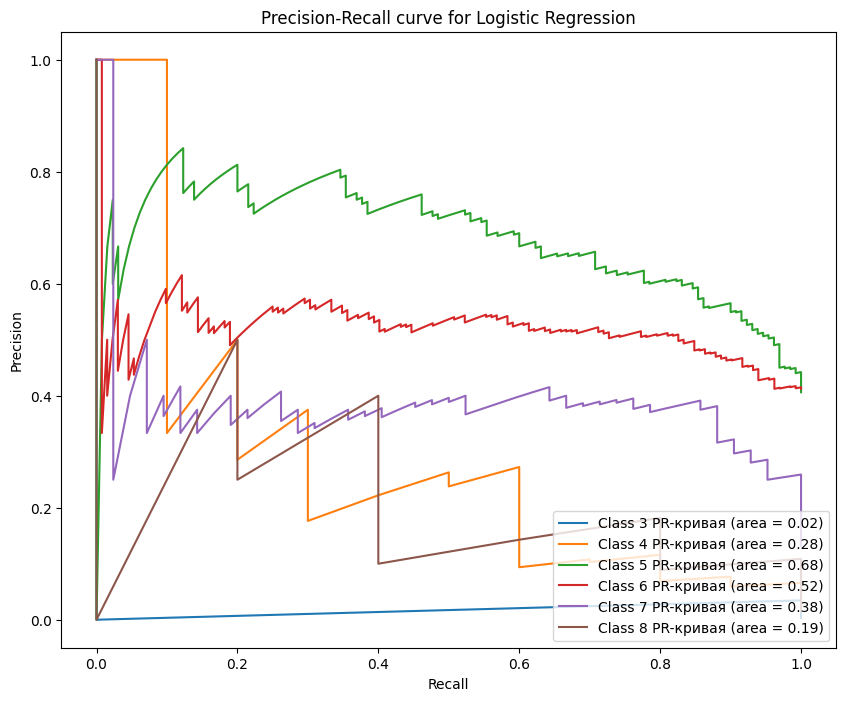

Decision Tree:
Accuracy (Train): 1.0000
Accuracy (Test): 0.5625
F1 Score (Train): 1.0000
F1 Score (Test): 0.5576
ROC-AUC (Train): 1.0000
ROC-AUC (Test): 0.5861


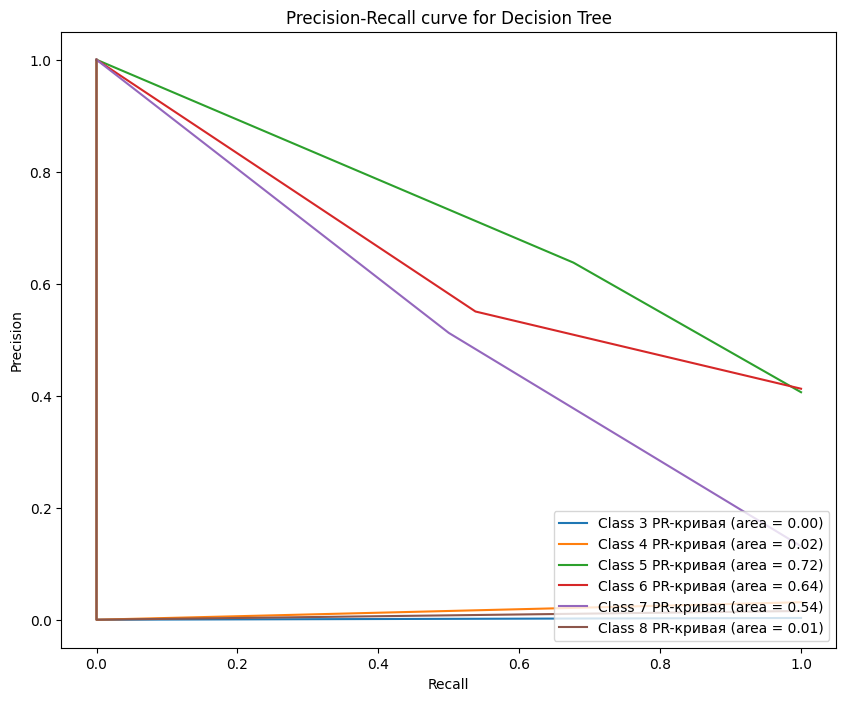

K-Nearest Neighbors:
Accuracy (Train): 0.7177
Accuracy (Test): 0.5469
F1 Score (Train): 0.7032
F1 Score (Test): 0.5309
ROC-AUC (Train): 0.9384
ROC-AUC (Test): 0.6746


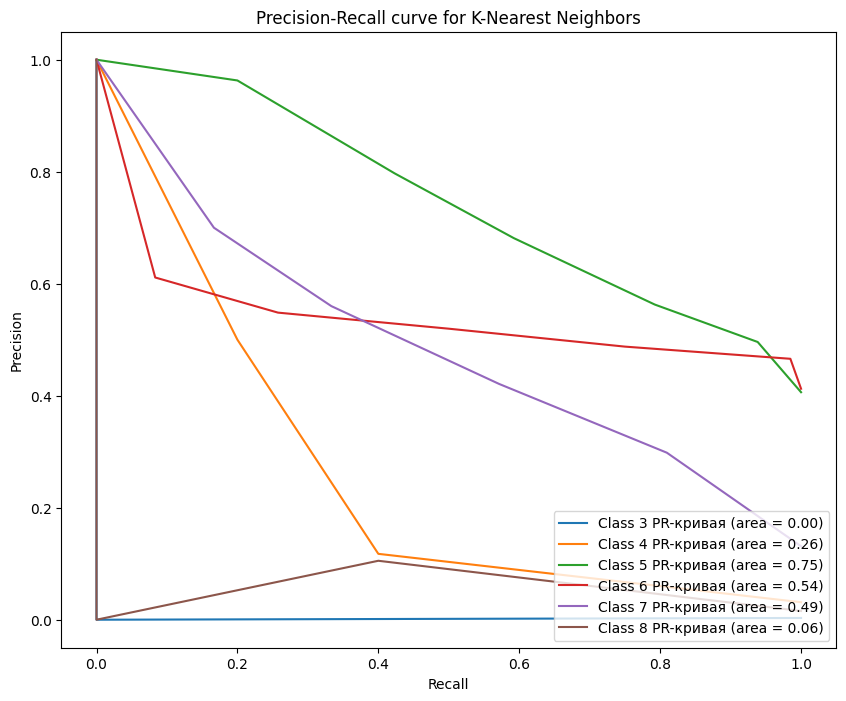

Random Forest:
Accuracy (Train): 1.0000
Accuracy (Test): 0.6594
F1 Score (Train): 1.0000
F1 Score (Test): 0.6438
ROC-AUC (Train): 1.0000
ROC-AUC (Test): 0.7804


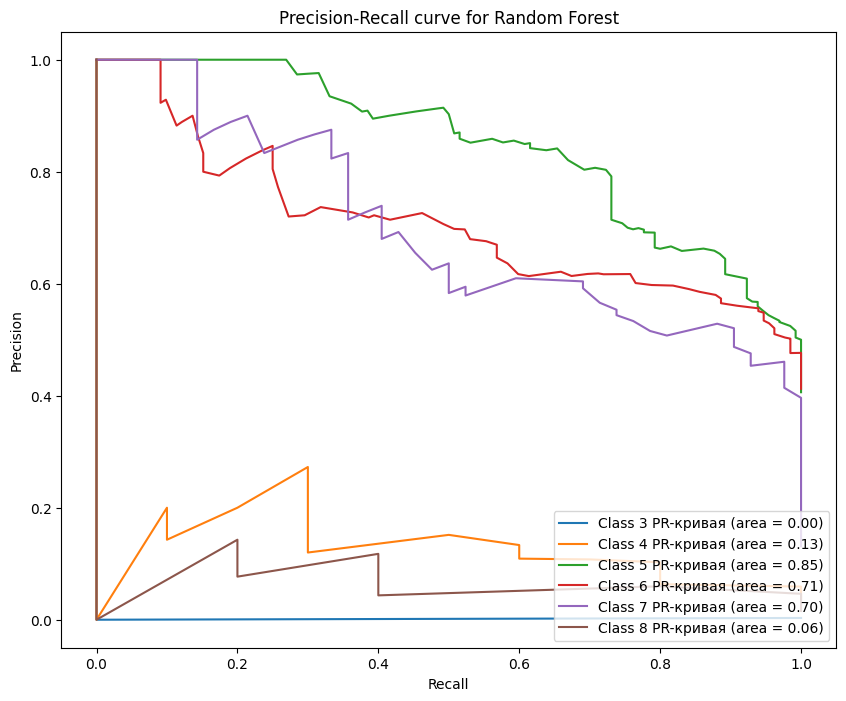

In [25]:
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Функция для вычисления метрик и построения PR-кривой для каждого класса
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print(f"{model_name}:")
    print(f"Accuracy (Train): {acc_train:.4f}")
    print(f"Accuracy (Test): {acc_test:.4f}")
    print(f"F1 Score (Train): {f1_train:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")

    # ROC-AUC
    try:
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        print(f"ROC-AUC (Train): {roc_auc_train:.4f}")
        print(f"ROC-AUC (Test): {roc_auc_test:.4f}")
    except:
        print("ROC-AUC не поддерживается для этой модели")

    # PR-кривая для многоклассовой классификации
    try:
        # Бинаризация меток
        y_test_bin = label_binarize(y_test, classes=[3, 4, 5, 6, 7, 8])
        n_classes = y_test_bin.shape[1]

        # Получение вероятностей для каждого класса
        y_scores = model.predict_proba(X_test)

        # Построение PR-кривых для каждого класса
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, label=f'Class {i+3} PR-кривая (area = {pr_auc:.2f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    except:
        print("PR-кривая не может быть построена для этой модели")

# Оценка каждой модели
evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")
evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")
evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")
evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

# Кратко + ответы на вопросы


Логистическая Регрессия:


Accuracy (Train): 0.6031

Accuracy (Test): 0.5666

ROC-AUC (Train): 0.8416

ROC-AUC (Test): 0.8389

F1 Score (Train): 0.5748

F1 Score (Test): 0.5229

______________________________________________

Дерево Решений:


Accuracy (Train): 1.0000

Accuracy (Test): 0.5625

ROC-AUC (Train): 1.0000

ROC-AUC (Test): 0.5861

F1 Score (Train): 1.0000

F1 Score (Test): 0.5576


______________________________________________
K-Nearest Neighbors (KNN):


Accuracy (Train): 0.7177

Accuracy (Test): 0.5469

ROC-AUC (Train): 0.9384

ROC-AUC (Test): 0.6746

F1 Score (Train): 0.7032

F1 Score (Test): 0.5309

______________________________________________
Случайный Лес:


Accuracy (Train): 1.0000

Accuracy (Test): 0.6594

ROC-AUC (Train): 1.0000

ROC-AUC (Test): 0.7804

F1 Score (Train): 1.0000

F1 Score (Test): 0.6438


______________________________________________

Сравнение метрик:

Точность (Accuracy):


Лучшая модель на тестовых данных: Случайный Лес (0.6594)

Худшая модель на тестовых данных: Дерево Решений (0.5625)

______________________________________________
ROC-AUC:


Лучшая модель на тестовых данных: Случайный Лес (0.7804)

Худшая модель на тестовых данных: Дерево Решений (0.5861)

______________________________________________
F1 Score:

Лучшая модель на тестовых данных: Случайный Лес (0.6438)

Худшая модель на тестовых данных: Дерево Решений (0.5576)


______________________________________________
Ответы на вопросы:

Какая модель справилась лучше с поставленной задачей?

Случайный Лес показал лучшие результаты на тестовых данных по всем метрикам (Accuracy, ROC-AUC, F1 Score).

______________________________________________
Имеет ли место переобучение?

Да, имеет место переобучение. Особенно это заметно у Дерева Решений и Случайного Леса, где метрики на тренировочных данных равны 1, а на тестовых данных значительно ниже.

______________________________________________
Имеет ли место недообучение?

Недообучение в данном случае не наблюдается, так как модели на тренировочных данных показывают высокие результаты.
______________________________________________
Как можно улучшить метрики моделей?

Для уменьшения переобучения:

*Использовать регуляризацию (например, ограничение глубины
деревьев, минимальное количество примеров в листьях для деревьев решений и случайного леса).

*Подбор гиперпараметров с помощью поиска по сетке или случайного поиска.

______________________________________________
Для улучшения производительности:

*Провести анализ дисбаланса классов и использовать методы балансировки данных (upsampling/downsampling).

*Увеличить объем данных для тренировки.

*Использовать ансамбли методов, такие как градиентный бустинг, для улучшения обобщающей способности.


# Общий анализ:

**Переобучение:**

Дерево Решений и Случайный Лес демонстрируют сильное переобучение. Они идеально подходят для тренировочных данных (точность, F1 Score и ROC-AUC равны 1), но значительно хуже работают на тестовых данных.

Логистическая Регрессия и KNN также показывают некоторое переобучение, но в меньшей степени. Точность, F1 Score и ROC-AUC на тренировочных данных выше, чем на тестовых, но разница не так значительна.

**Производительность на тестовых данных:**

Случайный Лес имеет наилучшую точность (0.6594) и F1 Score (0.6438) среди всех моделей на тестовых данных, хотя и страдает от переобучения.

Логистическая Регрессия и KNN показывают схожие результаты на тестовых данных, но немного хуже, чем Случайный Лес.
Дерево Решений имеет самые низкие показатели на тестовых данных, что указывает на его неспособность обобщать.

**Precision-Recall Curve:**

Случайный Лес показывает лучшие результаты на большинстве классов, особенно на классе 5 (PR-AUC = 0.85).
KNN и Логистическая Регрессия также показывают приемлемые результаты на некоторых классах, но хуже справляются с классами 3 и 8.

Дерево Решений плохо справляется с классами 3 и 8, а также имеет низкие значения PR-AUC для других классов.

**Заключение:**

Случайный Лес является наиболее мощной моделью среди рассмотренных, но страдает от сильного переобучения. Несмотря на это, он показывает лучшие результаты на тестовых данных по сравнению с другими моделями.

Логистическая Регрессия и KNN демонстрируют умеренные результаты с некоторым переобучением, но они более стабильны и менее склонны к переобучению по сравнению с деревом решений и случайным лесом.

Дерево Решений показывает худшие результаты из всех моделей, как на тренировочных, так и на тестовых данных, и требует значительного улучшения.

**Анализ вывода для ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Метрики для Логистической Регрессии:

Accuracy (Точность):

Тренировочные данные: 0.6031

Тестовые данные: 0.5666

Точность модели на тренировочных данных немного выше, чем на тестовых, что может указывать на небольшое переобучение. Однако, разница не очень значительна.

F1 Score:

Тренировочные данные: 0.5748

Тестовые данные: 0.5229

F1 Score, который учитывает как точность (precision), так и полноту (recall), также немного выше на тренировочных данных. Это согласуется с наблюдением по точности.

ROC-AUC:

Тренировочные данные: 0.8416

Тестовые данные: 0.8389

Значения ROC-AUC очень близки, что указывает на хорошую способность модели различать классы как на тренировочных, так и на тестовых данных.

График Precision-Recall Curve:

График Precision-Recall (PR) показывает компромисс между точностью (precision) и полнотой (recall) для различных классов. На графике указаны значения площади под кривой (PR-kymeas) для каждого класса:

Class 3: area=0.02

Class 4: area=0.28

Class 5: area=0.08

Class 6: area=0.52

Class 7: area=0.38

Class 8: area=0.19

Площадь под кривой PR (PR-AUC) является мерой того, насколько хорошо модель может различать положительные и отрицательные примеры для каждого класса. Чем выше значение PR-AUC, тем лучше модель работает для данного класса.

Class 6 имеет наибольшую площадь (0.52), что указывает на лучшую производительность для этого класса.

Class 3 и Class 5 имеют наименьшие значения (0.02 и 0.08 соответственно), что говорит о том, что модель хуже справляется с этими классами.


**Анализ вывода для ДЕРЕВА РЕШЕНИЙ**

Метрики для Дерева Решений:

Accuracy (Точность):

Тренировочные данные: 1.0000

Тестовые данные: 0.5625

Точность на тренировочных данных равна 1, что указывает на идеальное соответствие. Однако, на тестовых данных точность
значительно ниже, что сигнализирует о сильном переобучении.

F1 Score:

Тренировочные данные: 1.0000

Тестовые данные: 0.5576

F1 Score, который учитывает как точность (precision), так и полноту (recall), также показывает идеальные значения на тренировочных данных, но значительно хуже на тестовых данных. Это подтверждает проблему переобучения.

ROC-AUC:

Тренировочные данные: 1.0000

Тестовые данные: 0.5861

ROC-AUC на тренировочных данных также равен 1, что указывает на идеальное различение классов. Однако, на тестовых данных ROC-AUC значительно ниже, что свидетельствует о плохой способности модели обобщать на новые данные.

График Precision-Recall Curve:

График Precision-Recall (PR) показывает компромисс между точностью (precision) и полнотой (recall) для различных классов. На графике указаны значения площади под кривой (PR-кривая) для каждого класса:

Class 3: area=0.00

Class 4: area=0.02

Class 5: area=0.72

Class 6: area=0.64

Class 7: area=0.54

Class 8: area=0.01

Площадь под кривой PR (PR-AUC) является мерой того, насколько хорошо модель может различать положительные и отрицательные примеры для каждого класса. Чем выше значение PR-AUC, тем лучше модель работает для данного класса.

Class 5 и Class 6 имеют наибольшие площади (0.72 и 0.64 соответственно), что указывает на лучшую производительность для этих классов.

Class 3 и Class 8 имеют наименьшие значения (0.00 и 0.01 соответственно), что говорит о том, что модель практически не справляется с этими классами.

Вывод:

Дерево Решений демонстрирует сильное переобучение, так как модель идеально подходит для тренировочных данных, но значительно хуже работает на тестовых данных. Это видно по низким значениям точности, F1 Score и ROC-AUC на тестовых данных.

График Precision-Recall Curve показывает, что модель хорошо справляется с классами 5 и 6, но плохо с классами 3 и 8.

**Анализ вывода для *K-Nearest Neighbors***

Метрики для K-Nearest Neighbors:

Accuracy (Точность):

Тренировочные данные: 0.7177

Тестовые данные: 0.5469

Точность на тренировочных данных выше, чем на тестовых, что может указывать на некоторое переобучение. Однако, разница не так значительна, как в случае с деревом решений.

F1 Score:

Тренировочные данные: 0.7032

Тестовые данные: 0.5309

F1 Score, который учитывает как точность (precision), так и полноту (recall), также выше на тренировочных данных. Это согласуется с наблюдением по точности.

ROC-AUC:

Тренировочные данные: 0.9384

Тестовые данные: 0.6746

ROC-AUC на тренировочных данных значительно выше, чем на тестовых, что указывает на то, что модель лучше различает классы на тренировочных данных, но хуже обобщает на новые данные.

График Precision-Recall Curve:

График Precision-Recall (PR) показывает компромисс между точностью (precision) и полнотой (recall) для различных классов. На графике указаны значения площади под кривой (PR-кривая) для каждого класса:

Class 3: area=0.00

Class 4: area=0.26

Class 5: area=0.75

Class 6: area=0.54

Class 7: area=0.49

Class 8: area=0.06

Площадь под кривой PR (PR-AUC) является мерой того, насколько хорошо модель может различать положительные и отрицательные примеры для каждого класса. Чем выше значение PR-AUC, тем лучше модель работает для данного класса.

Class 5 имеет наибольшую площадь (0.75), что указывает на лучшую производительность для этого класса.

Class 3 и Class 8 имеют наименьшие значения (0.00 и 0.06 соответственно), что говорит о том, что модель практически не справляется с этими классами.

Вывод:

K-Nearest Neighbors показывает умеренные результаты с некоторым переобучением. Точность, F1 Score и ROC-AUC выше на тренировочных данных, чем на тестовых, что указывает на некоторую склонность к переобучению.
График Precision-Recall Curve показывает, что модель хорошо справляется с классом 5, но плохо с классами 3 и 8.

**Анализ вывода для *Случайного Леса***

Метрики для Случайного Леса:

Accuracy (Точность):

Тренировочные данные: 1.0000

Тестовые данные: 0.6594

Точность на тренировочных данных равна 1, что указывает на идеальное соответствие. Однако, на тестовых данных точность значительно ниже, что сигнализирует о переобучении.

F1 Score:

Тренировочные данные: 1.0000

Тестовые данные: 0.6438

F1 Score, который учитывает как точность (precision), так и полноту (recall), также показывает идеальные значения на тренировочных данных, но значительно хуже на тестовых данных.

Это подтверждает проблему переобучения.

ROC-AUC:

Тренировочные данные: 1.0000

Тестовые данные: 0.7804

ROC-AUC на тренировочных данных также равен 1, что указывает на идеальное различение классов. Однако, на тестовых данных ROC-AUC значительно ниже, что свидетельствует о плохой способности модели обобщать на новые данные.

График Precision-Recall Curve:

График Precision-Recall (PR) показывает компромисс между точностью (precision) и полнотой (recall) для различных классов. На графике указаны значения площади под кривой (PR-кривая) для каждого класса:


Class 3: area=0.00

Class 4: area=0.13

Class 5: area=0.85

Class 6: area=0.71

Class 7: area=0.70

Class 8: area=0.06

Площадь под кривой PR (PR-AUC) является мерой того, насколько хорошо модель может различать положительные и отрицательные примеры для каждого класса. Чем выше значение PR-AUC, тем лучше модель работает для данного класса.

Class 5 имеет наибольшую площадь (0.85), что указывает на лучшую производительность для этого класса.

Class 3 и Class 8 имеют наименьшие значения (0.00 и 0.06 соответственно), что говорит о том, что модель практически не справляется с этими классами.

Вывод:

Случайный Лес демонстрирует сильное переобучение, так как модель идеально подходит для тренировочных данных, но значительно хуже работает на тестовых данных. Это видно по низким значениям точности, F1 Score и ROC-AUC на тестовых данных.

График Precision-Recall Curve показывает, что модель хорошо справляется с классом 5, но плохо с классами 3 и 8.